<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2020/21 Term 2
</div>

# CS105 Group Project Submission

-----
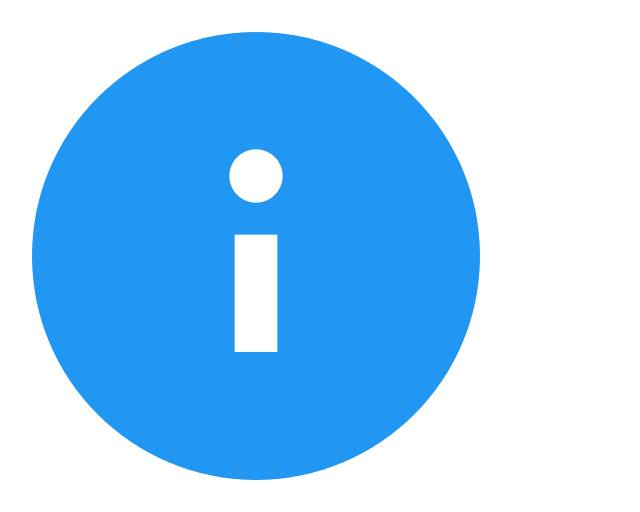Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.
<br>
-----

#### Section: G1
#### Team: T8
#### Members:
1. Cheah King Yeh
2. Ong Chi Kiat, Nicholas
3. Lai Jye Yi
4. Lim Hui Shan, Yvonne
5. Yuen Kah May

#### Dataset: housing.csv

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#read the dataset
df = pd.read_csv('4_housing.csv')

In [2]:
df.head(10)

,ID,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Colored_Ratio,Low_Income,Price
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### 1. Overview of dataset [15% of Part I]

#### **a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 

The dataset contains data from a census survey with regards to housing in a region. Each row corresponds to a town, hence the values of each attribute is for each town. We will be using the dataset to investigate the impact of various factors on the median price of the houses in a town.

#### **b.** State the size of the dataset

In [3]:
n_rows, n_cols = df.shape # .shape returns a tuple representing the dimensionality of the dataframe
print(f"# no of rows is {n_rows}")
print(f"# no of columns is {n_cols}")

# no of rows is 506
# no of columns is 15


**Response.** There are 506 rows and 15 columns (before any data pre-processing) 

#### **c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

|Column name|<p align="left"> Explanation|<p align="left"> Data type| Details|
|:---:|:---:|:---:|:---:|
|ID|<p align="left"> Identification Number | categorical | 
|Crime_Rate| <p align="left"> Crime rate per capita | numerical | 
|Residential_Area| <p align="left"> Percentage of residential area greater than 25000 square feet | numerical |
|Non_Retail| <p align="left"> Percentage of business areas used for non-retail | numerical |
|River| <p align="left"> Near bridge | categorical | 0: far from major river 1: near major river|
|Pollutants| <p align="left"> Concentration of pollutants (parts per 10 million) | numerical |
|Rooms| <p align="left"> Number of rooms per unit | numerical |
|Old_Housing| <p align="left"> Percentage of units built before second world war |numerical|
|Distance_Office| <p align="left"> Weighted distances to major office areas | numerical |
|Highway_Access| <p align="left"> Accessibility index to major highways | numerical | 
|Tax_Rate| <p align="left"> Property tax rate per $10000 | numerical |
|Student_Teacher_Ratio| <p align="left"> Student to teacher ratio | numerical |
|Coloured_Ratio| <p align="left"> Equals to 1000(B-0.63)^2, where B is the percent of blacks | numerical |
|Low_Income| <p align="left"> Percentage of low income households | numerical |
|Price| <p align="left"> Median price of homes (in `$1000s`) | numerical |

### 2. Data pre-processing [35% of Part I]

#### **a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 

As shown below, the only variable with missing data is `River`, with 1.7787% of missing data. We decided to drop the rows with the missing data for 2 main reasons. (1) There is only a small percentage of rows with missing data. (2) We do not have any specific domain knowledge or insight regarding the geographical location of the town where the data was collected. Hence, it is not quite possible to fill these gaps through imputation. A practical approach would be to drop the rows.

In total, 9 rows (1.7787% of total rows) were dropped, leaving 497 rows left.

In [4]:
# to count the percentage of elements which is not NaN for each column.
df.count() / n_rows

ID                       1.000000
Crime_Rate               1.000000
Residential_Area         1.000000
Non_Retail               1.000000
River                    0.982213
Pollutants               1.000000
Rooms                    1.000000
Old_Housing              1.000000
Distance_Office          1.000000
Highway_Access           1.000000
Tax_Rate                 1.000000
Student_Teacher_Ratio    1.000000
Colored_Ratio            1.000000
Low_Income               1.000000
Price                    1.000000
dtype: float64

In [5]:
df.dropna(inplace = True) # this line drops the rows where there are missing data
print(f"The shape of the resulting dataframe is now {df.shape}")

The shape of the resulting dataframe is now (497, 15)


After dropping the rows with missing data values, there are now **497 rows and 15 columns**.

In [6]:
df.dtypes # finding the datatype of all variables

ID                         int64
Crime_Rate               float64
Residential_Area         float64
Non_Retail               float64
River                    float64
Pollutants               float64
Rooms                    float64
Old_Housing              float64
Distance_Office          float64
Highway_Access             int64
Tax_Rate                   int64
Student_Teacher_Ratio    float64
Colored_Ratio            float64
Low_Income               float64
Price                    float64
dtype: object

Looking at the data dictionary, we see that `River` is in fact a **categorical feature**. They can't be `float` but we could use `int` to represent them. Hence, we decided to we **cast it** to `int`.

In [7]:
print(f"Data type of River before casting: {df.River.dtypes}") # find out the datatype of River before casting

df.River = df.River.astype(int) # casting the datatype of River to an int

print(f"Data type of River after casting: {df.River.dtypes}") # find out the datatype of River after casting


Data type of River before casting: float64
Data type of River after casting: int64


<font color=red size=3>
    [1a] 15%
</font>

#### **b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

**Response**

In [8]:
#this code finds out the percentage of outliers for every variable in the dataset, following the IQR definition of outliers

for k, v in df.items(): 
    # we will not be finding the outliers for River and ID since they are categorical
    if (k != 'River' and k != 'ID'): 
        q1 = v.quantile(0.25) # this identifies the 25th percentile
        q3 = v.quantile(0.75) # this identifies the 75th percentile
        irq = q3 - q1 #this is the interquartile range 
        
        v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)] # these rows are outliers 
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]  # finding percentage of outliers
        print("Column %s:  outliers = %.2f%%" % (k, perc))

Column Crime_Rate:  outliers = 13.28%
Column Residential_Area:  outliers = 13.48%
Column Non_Retail:  outliers = 0.00%
Column Pollutants:  outliers = 0.00%
Column Rooms:  outliers = 6.04%
Column Old_Housing:  outliers = 0.00%
Column Distance_Office:  outliers = 1.01%
Column Highway_Access:  outliers = 0.00%
Column Tax_Rate:  outliers = 0.00%
Column Student_Teacher_Ratio:  outliers = 3.02%
Column Colored_Ratio:  outliers = 15.09%
Column Low_Income:  outliers = 1.21%
Column Price:  outliers = 8.05%


As shown from the percentages of outliers above, variables with outlier percentages **above 10%** include `Colored_Ratio`,`Residential_Area`and `Crime Rate`. On the other hand, variables with outlier percentages **less than 5%** include `Distance_Office`, `Student_Teacher_Ratio`, `Low_Income`. Due to the **small size of our dataset**, we were careful in dropping rows while dealing with outliers. For every independent variable, we will **first create a boxplot** to get a rough idea of the number of outliers. If there is no outliers identified by the boxplot, there will be no need to deal with outliers. **Should there be any outliers**, we will **using a scatter plot** to further investigate its relationship with the dependent variable which we are interested in, `Price`, before deciding the appropriate way of dealing with them contextually. 

### Variables without outliers


As shown in the analysis of percentage of outliers for each variable above, as well as the box plots created, it suggests that the variables `Non_Retail`, `Pollutants`, `Old_Housing`, `Highway_Access` and `Tax-Rate` **do not have any outliers**. Hence, for these variables there is no need to deal with outliers.

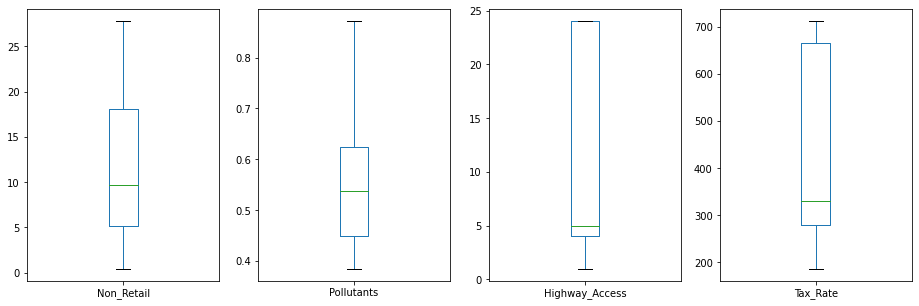

In [9]:
# creating box plot to show the lack of outliers for the following variables
df_no_outliers = df[["Non_Retail", "Pollutants", "Highway_Access", "Tax_Rate"]]
df_no_outliers.plot(kind='box',  subplots = True, layout=(1, 5), figsize=(20, 5))
plt.show()

### 1. Dealing with Colored Ratio outliers

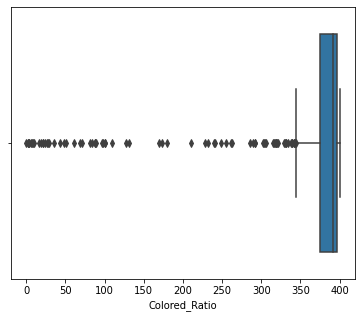

In [10]:
# creating box plot for colored ratio varibale

fig = plt.figure(figsize=(21, 5))

plt.subplot(1,3,2)
ax1 = sns.boxplot(x = df["Colored_Ratio"])

From the boxplot, it appears that there are quite a few outliers, mostly from those areas with a lower colored ratio. However, we believed that it would be **too risky to remove outliers solely based on a univariate analysis of outliers**. Additionally, we also found that the `Colored_Ratio` index was not truly representative of the percentage of blacks in the area, as explained below.

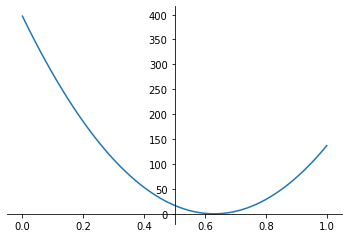

In [11]:
# this graph plots B against colored ratio

# creating 100 linearly spaced numbers
x = np.linspace(0,1,100)
# the function here was provided by the data dictionary (1000(B - 0.63)^2)
y = 1000*((x-0.63)**2)
z = 1000*((1-0.63)**2)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y)

plt.show()

In [12]:
print(f"when there is 100% blacks in the area (B = 1): {1000*((1-0.63)**2)}")
print(f"when there is 26% blacks in the area (B = 0.26): {1000*((0.26-0.63)**2)}")
print(f"when there is 0% blacks in the area (B = 1): {1000*((0-0.63)**2)}")

when there is 100% blacks in the area (B = 1): 136.9
when there is 26% blacks in the area (B = 0.26): 136.9
when there is 0% blacks in the area (B = 1): 396.90000000000003


The quadratic graph above depicts the relationship between `Colored_Ratio` (y-axis) and the percentage of Blacks in each town (x-axis). 

As shown in the calculations above, two different percentage of Blacks (26% and 100%) can give the same value of coloured ratio (136.9).

Generally, when the `Colored_Ratio` falls below 136.9, there are **two possible values for** `Percentage of Blacks`, making it to **impossible to conclude the percentage of blacks in a town purely based on its** `Colored_Ratio`. Hence, we felt that this makes the `Colored Ratio` unreliable as it would be difficult to make any conlusions about the actual percentage of Blacks in the town. Hence, we did not want to remove any outliers soley based on this variable, since we would also be getting rid of useful information on the other independent variables in the same data row.

Hence, the only outliers that we will remove are those that are considered faulty data, since it is not possible for the coloured ratio to be above 100%, or below 0%. We will thus be removing all data points with values that falls outside the range of 136.9 and 396.9.

In [13]:
df["Colored_Ratio"].describe()

count    497.000000
mean     356.596419
std       91.937406
min        0.320000
25%      375.520000
50%      391.500000
75%      396.420000
max      400.000000
Name: Colored_Ratio, dtype: float64

In [14]:
df = df[(df.Colored_Ratio <= 396.9)] #removing data above maximum possible value for Colored_Ratio
df = df[(df.Colored_Ratio > 136.9)] #removing data below minimum possible value for Colored_Ratio

df["Colored_Ratio"].describe()

count    457.000000
mean     380.356389
std       32.741807
min      169.270000
25%      379.380000
50%      392.430000
75%      396.900000
max      396.900000
Name: Colored_Ratio, dtype: float64

### 2. Dealing with Residential Area outliers

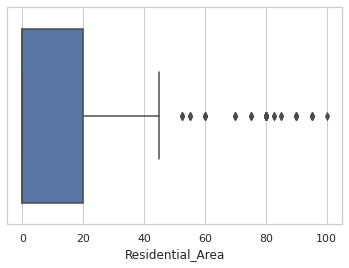

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Residential_Area"]) # create scatter plot for residential area

From the boxplot, it appears that there are quite a few outliers, mostly from those areas with a higher percentage of residential area greater then 25000 square feet. Similarly, we believed that it would be **too risky to remove outliers solely based on a univariate analysis of outliers**. As such, we used a scatter graph to identify any relationship between `Residential_Area` and `Price`, before dealing with outliers.

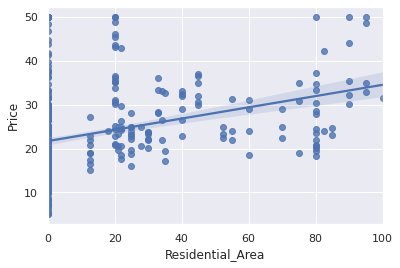

In [16]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Residential_Area", y ="Price", data = df) # creating scatter plot for Residential Area

As shown from the scatter plot above, majority of the data points seem to take the value of 0 for `Residential_Area`. As such, we decided to plot a histogram to investigate further as shown below.

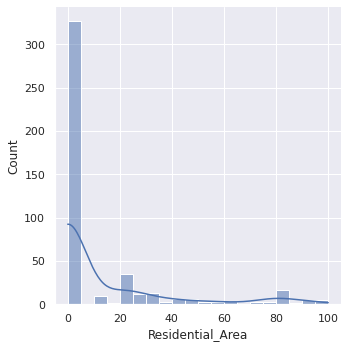

In [17]:
sns.displot(x=df['Residential_Area'], kde = True) # creating histogram for residential area

From the histogram as shown above, 70% of the data contains the value 0 for `Residential_Area`. After consideration, we realised that the variable `Residential_Area` **may not be useful towards our investigation towards its relationship with** `Price`. This is because there is a **little information** about what 0 could represent (i.e we do not know the extent to which houses are below 25000 square feet) and were not given further information on the distribution of values within the range. For example, all the houses can be below 20,000 square feet for a particular data row, whereas for a different data row, all the houses can be below 10,000 square feet. However, both rows would be recorded as 0 for `Residential_Area`, which could be an **important factor** affecting housing prices. 

Therefore, due to the **limited information** provided by the dataset, we decided that it was **too risky** to be removing any outliers solely based on `Residential_Area` as we would be **removing other useful data for other independent variables** in the same data row.

### 3. Dealing with Crime Rates outliers

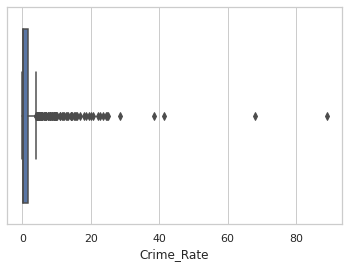

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Crime_Rate"]) #creating a boxplot for crime rates

From the boxplot, it appears that there are many outliers, mostly those with a high crime rate. However, we believed that these data points could be **relevant to our analysis later on**, and it would be **too risky to remove outliers solely based on a univariate analysis of outliers**. As such, we used a scatter graph to identify any relationship between `Crime_Rates` and `Price`, in order to determine if the outliers changes our result of analysis. We thus **plotted a scatter plot** against `Price` both with and without the outliers before coming up with an appropriate way to deal with the outliers reflected.

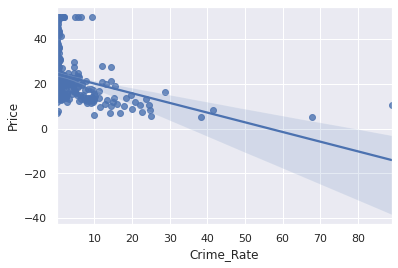

In [19]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Crime_Rate", y ="Price", data = df) #creating a scatter plot for crime rates

The graph above shows the scatter plot of `Crime_Rate` **before removal of outliers**. As shown from the scatter plot, there are a **few point outliers that are prominently anamolous with respect to the majority of the data points** (towns with very high crime rates). 

Upper threshold: 3.953475
Lower threshold: -2.2460850000000003
Outliers not shown in plot: 86


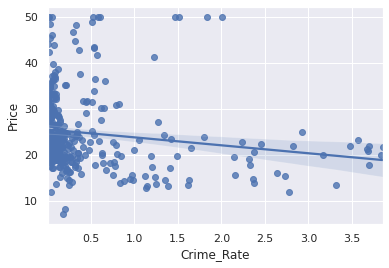

In [20]:
q1_Crime_Rate = df.Crime_Rate.describe()["25%"] # the 25th percentile
q3_Crime_Rate = df.Crime_Rate.describe()["75%"] # the 75th percentile

upper_threshold = q3_Crime_Rate + 1.5 * (q3_Crime_Rate-q1_Crime_Rate) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold = q1_Crime_Rate - 1.5 * (q3_Crime_Rate-q1_Crime_Rate) # determines lower threshold. Plots below this value would be considered outliers
Crime_Rate_NoOutliers = df[(df.Crime_Rate <= upper_threshold) & (df.Crime_Rate >= lower_threshold)] # create scatter plot without outliers

# creating scatter plot for crime rate without outliers
sns.set_theme(color_codes=True)
Crime_Rate_Outliers = df[(df.Crime_Rate < lower_threshold)|(df.Crime_Rate > upper_threshold)] 
ax = sns.regplot(x = "Crime_Rate", y ="Price", data = Crime_Rate_NoOutliers)

print("Upper threshold: "f"{upper_threshold}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold}"); # value of lower threshold 

num_rows = len(Crime_Rate_Outliers.index) # number of outliers that was not reflected in the scatter plot
print(f'Outliers not shown in plot: ' + str(num_rows))

As shown above, **if we remove the outliers** based on the IQR rule of outliers, it would remove all data above crime rate of 9.07 (to 3 s.f) which is rather **significant** (13.28% of data) considering the small size of our dataset. Additionally, we felt that the data collected pertaining to higher crime rates would be **important to our analysis towards housing prices** in such areas as compared to areas with low crime rates. 

Since towns with such high crime rates are **usually uncommon** and could henceforth **skew our data**, we decided to **remove data points above the 97th percentile** of `Crime_Rates`, which we felt was a reasonable amount given the **small size** of our dataset.  

number of rows after dropping: 443


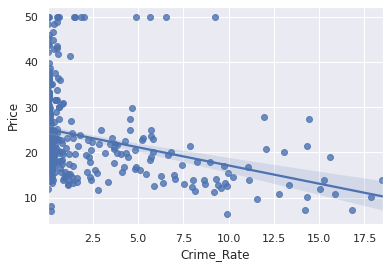

In [21]:
crimeRateAbove97Percentile = df.Crime_Rate.quantile(0.97)  # values above this are considered outliers and would be dropped 
df = df[(df.Crime_Rate <= crimeRateAbove97Percentile)] # dropping outliers

#finding the shape of dataframe after dropping outliers
n_rows, n_cols = df.shape
print(f"number of rows after dropping: {n_rows}")
sns.set_theme(color_codes = True)
ax = sns.regplot(x = "Crime_Rate", y ="Price", data = df) #creating a scatter plot of datafram after outliers were removed

The graph above shows the scatter plot **after** removing outliers.

### 4. Dealing with Price outliers

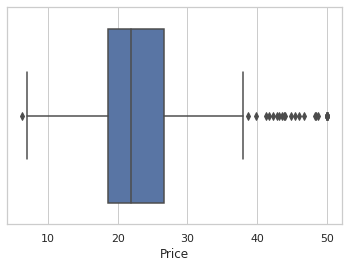

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Price"]) #creating a boxplot for price 

While there might appear to be many outliers for Price, we have chosen to **keep these data points** as Price is the **dependent variable** that we are assessing.

### 5. Dealing with Rooms outliers

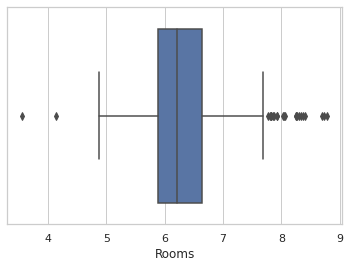

In [23]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Rooms"]) # creating box plot for rooms

First, we plotted a box plot to get a sense of outliers. We then decided to further analyse with a histogram as shown below.

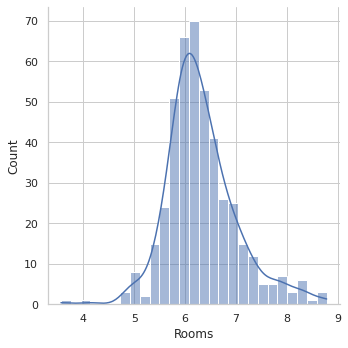

In [24]:
sns.displot(x=df['Rooms'], kde = True) # creating histogram for rooms

After plotting the histogram, we get a sense that the data is **roughly normal distribution**. Hence, we decided to deal with the outliers here by **removing data points that are above 3 standard deviations from the mean**, as shown in the code below.

In [25]:
room_std = df['Rooms'].std() # finding the standard deviation for rooms
print(f"The standard deviation for Room is : {room_std}")
room_mean = df['Rooms'].mean() # finding the mean for rooms
print(f"The mean for Room is : {room_mean}")

# dropping the outliers that are more than 3 standard deivations away from mean
df = df[(df.Rooms < room_mean + (3 * room_std)) & (df.Rooms > room_mean - (3 * room_std))]

n_rows, n_cols = df.shape # finding shape of data frame after dropping outliers
print(f"number of rows after dropping: {n_rows}")

The standard deviation for Room is : 0.6905504552960352
The mean for Room is : 6.323167042889391
number of rows after dropping: 437


### 6. Dealing with Student Teacher Ratio outliers

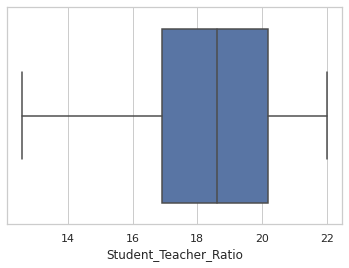

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Student_Teacher_Ratio"]) # creating box plot for student teacher ratio

After removing the outliers for the previous variables, the number of outliers for `Student Teacher Ratio` has been **reduced to 0**, as the boxplot suggests. Hence, there is **no preprocessing required**.

### 7. Dealing with Low Income outliers


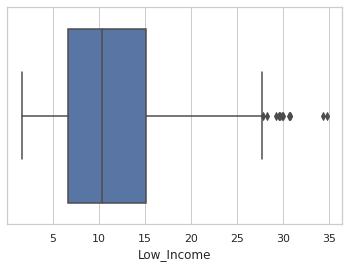

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Low_Income"]) #creating boxplot for low income

Based on the boxplot and calculation above, there is a **small percentage of outliers** (6 outliers). In order to prevent these outliers from affecting our analysis, we decided to **remove them**.  

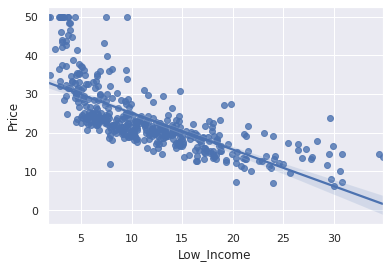

In [28]:
sns.set_theme(color_codes = True)
ax = sns.regplot(x = "Low_Income", y ="Price", data = df) # creating scatter plot

The graph above shows the scatter plot **before** removal of outliers. 

Upper threshold: 27.775
Lower threshold: -6.024999999999999
Number of outliers deleted: 13
number of rows after dropping: 424


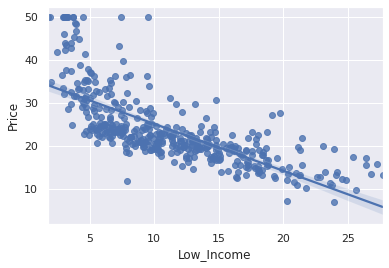

In [29]:
q1_Low_Income = df.Low_Income.describe()["25%"] # the 25th percentile
q3_Low_Income = df.Low_Income.describe()["75%"] # the 75th percentile

upper_threshold = q3_Low_Income + 1.5 * (q3_Low_Income-q1_Low_Income) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold = q1_Low_Income - 1.5 * (q3_Low_Income-q1_Low_Income) # determines lower threshold. Plots below this value would be considered outliers

print("Upper threshold: "f"{upper_threshold}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold}"); # value of lower threshold 
Low_Income_Outliers = df[(df.Low_Income < lower_threshold)|(df.Low_Income > upper_threshold)] 
num_rows = len(Low_Income_Outliers.index) # number of outliers that was removed
print(f'Number of outliers deleted: {num_rows}')

df = df[(df.Low_Income <= upper_threshold)] # drop outliers

n_rows, n_cols = df.shape # finding the shape after removing outliers
print(f"number of rows after dropping: {n_rows}")

# creating scatter plot after dropping outliers
sns.set_theme(color_codes = True)
ax = sns.regplot(x = "Low_Income", y ="Price", data = df)

The graph above shows the scatter plot after the **removal of outliers**. 

### 8. Dealing with Distance Office outliers

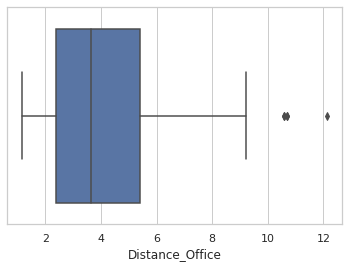

In [30]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df["Distance_Office"]) # creating box plot for distance office

Based on the boxplot above, there is a **small percentage of outliers** (5 outliers). In order to prevent these outliers from affecting our analysis, we decided to **remove them**.

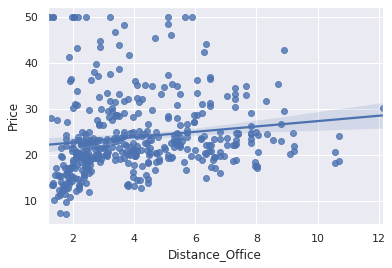

In [31]:
sns.set_theme(color_codes = True)
ax = sns.regplot(x = "Distance_Office", y ="Price", data = df) # creating scatter plot for distance office before removing outliers

The graph above shows the scatter plot **before removal of outliers**. 

Upper threshold: 9.956475
Lower threshold: -2.1517249999999994
Number of outliers deleted: 5
number of rows after dropping: 419


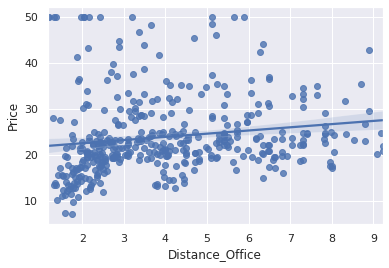

In [32]:
q1_Distance_Office = df.Distance_Office.describe()["25%"] # the 25th percentile
q3_Distance_Office = df.Distance_Office.describe()["75%"] # the 75th percentile

upper_threshold = q3_Distance_Office + 1.5 * (q3_Distance_Office - q1_Distance_Office) # determines upper threshold. Plots above this value would be considered outliers
lower_threshold = q1_Distance_Office - 1.5 * (q3_Distance_Office - q1_Distance_Office) # determines lower threshold. Plots below this value would be considered outliers

print("Upper threshold: "f"{upper_threshold}"); # value of upper threshold 
print("Lower threshold: "f"{lower_threshold}"); # value of lower threshold 
Distance_Office_Outliers = df[(df.Distance_Office < lower_threshold) | (df.Distance_Office > upper_threshold)] 
num_rows = len(Distance_Office_Outliers.index) # number of outliers that was removed
print(f'Number of outliers deleted: {num_rows}')

df = df[(df.Distance_Office <= upper_threshold) & (df.Distance_Office >= lower_threshold)] # drop outliers

n_rows, n_cols = df.shape # finding the shape after removing outliers
print(f"number of rows after dropping: {n_rows}")

# creating scatter plot after dropping outliers
sns.set_theme(color_codes = True)
ax = sns.regplot(x = "Distance_Office", y ="Price", data = df)


The graph above shows the scatter plot **after removal of outliers**. 

### 9. Dealing with Old Housing outliers

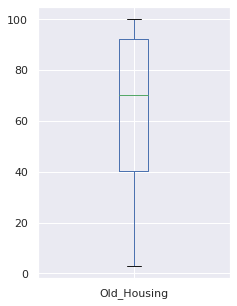

,Old_Housing
count,409.000000
mean,65.060147
std,28.372962
min,2.900000
25%,40.300000
50%,70.300000
75%,92.100000
max,100.000000


In [33]:
df = df[(df.Old_Housing <=100) & (df.Old_Housing >= 0)]
df_old_housing = df[["Old_Housing"]]
df_old_housing.plot(kind='box', subplots = True, layout=(1, 5), figsize=(20, 5))
plt.show()
df[["Old_Housing"]].describe()

Although it may seem that there is no outliers from the boxplot, there are some values that are faulty since it is not possible for the value of percentage to fall outside the range of 0 to 100. Hence, we would need to remove these values.

#### **c.** For categorical variables, perform the necessary encoding.

**Response.** 

No encoding is needed as all the categorical variables in the dataset (ID, River) are **displayed numerically**.

### 3.	Exploratory analysis and visualization [50% of Part I]

#### **a.** For each variable, provide relevant summary statistics

**Response.** 

Since `River` is a **categorial variable**, we decide to show the percentage of data that falls under each unique value. 

In [34]:
# Getting the percentage of towns with houses close to a river
df["River"] = df["River"].astype(str)  # convert the variable to a string so that it is treated categorical
data = df["River"].value_counts(normalize=True)
data

0    0.93154
1    0.06846
Name: River, dtype: float64

**Key observation:**

Percentage of towns with houses close to a river: **92.9%**

Percentage of towns with houses not close to a river: **7.11%**

For each **Numerical** variable, we conducted a **five-number summary** as shown below.

In [35]:
#Five-number summary for each of the numerical variables
df_numerics = df[["Crime_Rate", "Residential_Area", "Non_Retail", "Pollutants", "Rooms", "Old_Housing", "Distance_Office", "Highway_Access", "Tax_Rate", "Student_Teacher_Ratio", "Colored_Ratio", "Low_Income", "Price"]]
df_numerics.describe()

,Crime_Rate,Residential_Area,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Colored_Ratio,Low_Income,Price
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,1.611690,12.641809,10.109804,0.534667,6.350345,65.060147,4.038983,7.738386,373.266504,18.277506,381.449584,11.121222,23.877506
std,3.239187,24.303069,6.673346,0.107246,0.619262,28.372962,1.974842,7.491663,150.483615,2.159256,30.863958,5.635536,8.484240
min,0.006320,0.000000,0.460000,0.385000,4.963000,2.900000,1.169100,1.000000,188.000000,12.600000,169.270000,1.730000,7.000000
25%,0.068880,0.000000,4.930000,0.445000,5.933000,40.300000,2.388900,4.000000,276.000000,16.900000,380.790000,6.590000,19.000000
50%,0.175050,0.000000,8.140000,0.515000,6.229000,70.300000,3.651900,5.000000,307.000000,18.600000,392.740000,10.210000,22.000000
75%,1.002450,20.000000,18.100000,0.585000,6.642000,92.100000,5.401100,7.000000,403.000000,20.200000,396.900000,14.670000,27.000000
max,17.866700,100.000000,27.740000,0.871000,8.375000,100.000000,9.220300,24.000000,711.000000,21.200000,396.900000,27.710000,50.000000


#### **b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

Disclaimer: For each variable, we provided key observations and insights that we **inferred** from the data presented. This is done for the purpose of gaining more contextual knowledge on the dataset **due to the limited background information provided**. Note that these are **purely our assumptions and may not be an accurate representation of the dataset**. 

### 1. River univariate analysis

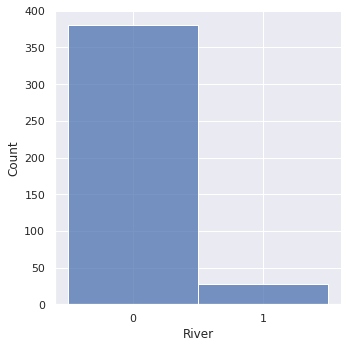

In [36]:
sns.displot(x = df['River']) # creating histogram for river

**Key Observations:**

According to the histogram, a **majority of the dataset have the value of 0** for the variable `River`. From the data dictionary, this suggests that a majority of the data are collected in places that are far from a major river. 

### 2. Crime Rate univariate analysis

<AxesSubplot:xlabel='Crime_Rate', ylabel='Count'>

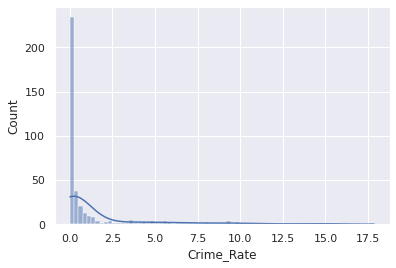

In [37]:
sns.histplot(data=df['Crime_Rate'], log_scale=False, kde=True) # creating histogram for crime rate

**Key observations:**

The `Crime_Rate` data provided is **heavy right skewed**. This suggests that it is more common for towns to have lower crime rates, as we would expect. Since a large proportion of the towns have the value of 0 crime rate per capita, it **could suggest** that the data was collected from a relatively **safe and developed country** with proper law enforcements. However, there still exists some areas where crime rates are significantly higher, which could be attributed to rural towns in the country where it is harder to enforce laws.

### 3. Residential Area univariate analysis

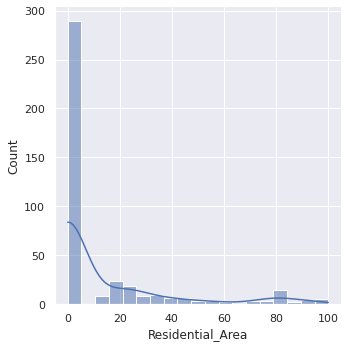

In [38]:
sns.displot(x=df['Residential_Area'], kde = True) # creating histogram for residential area

**Key Observations:** 

The `Residential_Area` data is **highly right skewed**. This suggests that a large majority of towns have a high proportion of houses with a residential area of less than 25,000 square feet. 

This could be due to a **variety of reasons**. For instance, the town could for **the people of lower socio-economic status** where people in the area are unable to afford bigger houses. Another plausible reason is that the data was collected in **areas that are densely populated**, where houses tend to be small in order to accomodate for more houses for the population. 

On the other hand, there are some towns with significantly higher value for residental areas, which can be attributed to areas where people of **higher socio-economic status live** in and are able to afford more luxurious houses.

### 4. Non-Retail univariate analysis

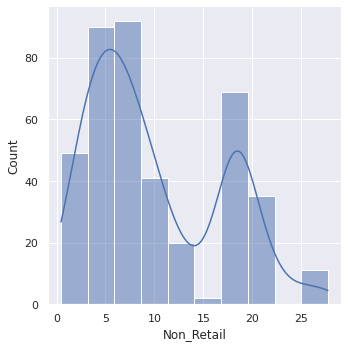

In [39]:
sns.displot(x=df['Non_Retail'], kde=True) #creating histogram for non retail 

**Key Observations:** 

There is a **large proportion of non-retail areas** spread evenly between 5 - 7 percent range and 17 percent range, giving this a **bimodal distribution**. 

### 5. Pollutants univariate analysis

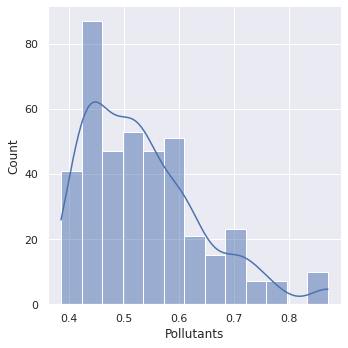

In [40]:
sns.displot(x=df['Pollutants'], kde = True) # creating histogram for pollutants

**Key Observations:**

The data for `Pollutants` is **right-skewed**, with majority of towns have pollution concentration of close to 0.5. As we would assume, **more towns have lower concentration of pollutants**, with lesser towns having high levels of pollutants. Data rows with high level of pollutants could be due to data collected in industrial areas, or with areas with high level of construction.

### 6. Rooms univariate analysis

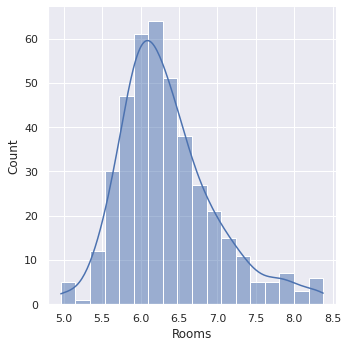

In [41]:
sns.displot(x=df['Rooms'], kde=True) # creating histogram for rooms

**Key Observations:** 

The distribution of `Rooms` is rather **normally distributed**. A majority of units having between 5.5 and 7.5 rooms on average, which could represent the number of rooms of a **typical house owned by a middle class individual**, for this particular country. Houses with more rooms are likely to be owned by wealthier individuals as the houses are larger and more luxurious.

### 7. Old Housing univariate analysis

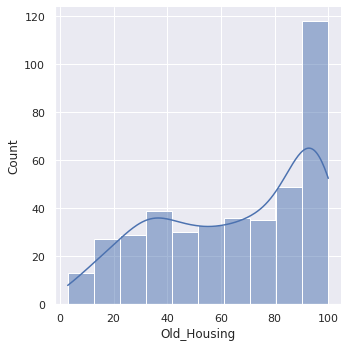

In [42]:
sns.displot(x=df['Old_Housing'], kde = True) # creating histogram for old housing

**Key Observations:** 

The data for `Old_Housing` is **left-skewed**, with majority of the data between the values of 90 to 100. This suggests that most data are collected in areas where buildings are mostly built before second world war. This seems to suggest that the data was collected in a country is **less developed**. The **more developed towns** in the country are likely to correspond to the data rows **with low percentage of units built before second world war**.

### 8. Distance Office univariate analysis

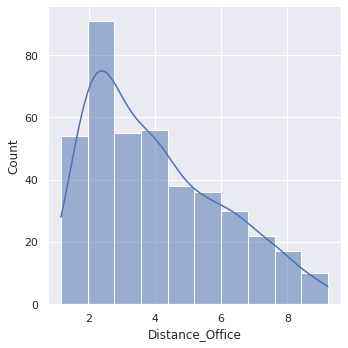

In [43]:
sns.displot(x=df['Distance_Office'], kde = True) # creating histogram for distance office

**Key Observations:** 

The data for `Distance_Office` is **right skewed** with majority of values between 1 and 3. This suggests that the weighted distances to major office areas from the town where the data is collected is **generally pretty near**. This could suggest that the country have conducted **sound urban planning**.

### 9. Highway Access univariate analysis

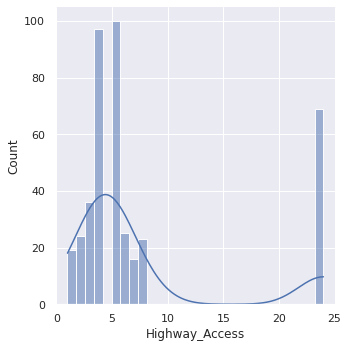

In [44]:
sns.displot(x=df['Highway_Access'], kde = True) # creating histogram for highway access

**Key Observations:** 

Towns with highway access of indexes **between 0 and 10 appear to be normally distributed**, and a **peak at index 24 with more than 100 towns**. This suggests that the data for `Highway_Access` follows a **edge peak distribution**. 

We **assume that there are no errors in data collection** and that the sudden peak at the end could **represent an interesting phenomenon**, perhaps the occurence of highly-connected city areas as opposed to more rural areas with lower accessibiity to highways. We would like to analyse this further later on.

### 10. Tax Rate univariate analysis

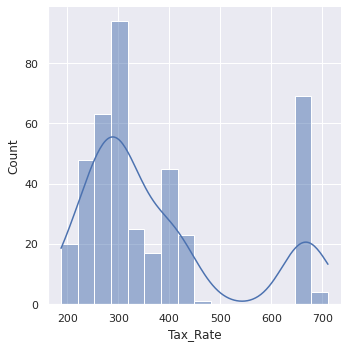

In [45]:
sns.displot(x=df['Tax_Rate'], kde = True) # creating histogram for tax rate

In [46]:
#finding the number of values of the second peak
df_second_peak = df[(df.Tax_Rate > 600)]

print(df_second_peak.Tax_Rate.value_counts())

666    69
711     4
Name: Tax_Rate, dtype: int64


**Key Observation:** 

Towns with `Tax_Rate` of indexes **between 100 and 500** appear to be **normally distributed**, and a **peak at index 666 with more than 100 towns**. This suggests that the data for `Tax_Rate` follows a **edge peak distribution**. 

We **assume that there are no errors in data collection** and that the sudden peak at the end **could represent an interesting phenomenon**, perhaps representing the `Tax_Rate` for the upper-class, since a property tax rate typically reflects the value of a house. The significant difference in property tax rate could be possibly attributed to **high income disparity** in the country where the data was collected. 

### 11. Student Teacher Ratio univariate analysis

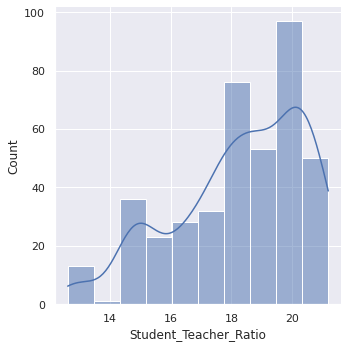

In [47]:
sns.displot(x=df['Student_Teacher_Ratio'], kde = True) # plotting histogram for student teacher ratio

**Key Observations:** 

The data for Student_Teacher_Ratio is **left skewed**, with majority of the data falling between the values of 18 to 20. However, we thought that the student teacher ratio is highly dependent on the type of education provided, and found it hard to obtain much insights regarding this.

### 12. Colored Ratio univariate analysis

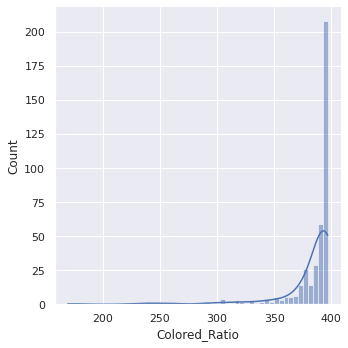

In [48]:
sns.displot(x=df['Colored_Ratio'], kde = True) # create histogram for coloured ratio

**Key Observation:** 

The data for `Colored_Ratio` is **heavily left-skewed**, with majority of the data between the values of 380 to 400. The higher the `Colored_Ratio`, the lower percentage of blacks in town. This could possibly be due to more towns having lower percentages of blacks due to the **ethnic demographics** of the country where the data is collected.

### 13. Low Income univariate analysis

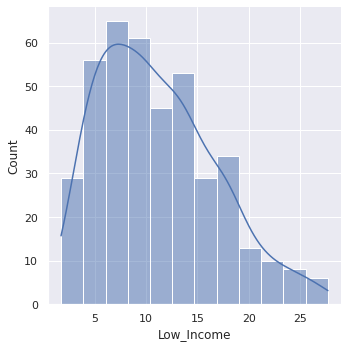

In [49]:
sns.displot(x=df['Low_Income'], kde = True) # create histogram for low income

**Key Observation:** 

The data for `Low_Income` is **right skewed**, with majority of the data between the values of 7.5 to 12.5. This could suggest that the country is **relatively wealthy**, with relatively low percentages of low-income households. 

### 14. Price univariate analysis

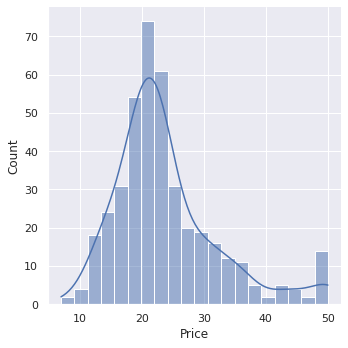

In [50]:
sns.displot(x=df['Price'], kde=True) # create histogram for price

In [51]:
#finding the number of values of the second peak
df_second_peak = df[(df.Price >= 50)]

print(df_second_peak.Price.value_counts())

50.0    12
Name: Price, dtype: int64


**Key Observations:** 

The distribution of `Price` seem to follow a **normal distribution** at the start, with the **majority of prices of homes lying between 20 and 25 thousand**, with a second peak at around index 50. This suggests that the data for `Price` follows an **edge peak distribution**.

We **assume that there are no errors in data collection** and that the sudden peak at the end could **correspond to wealthier towns in the country** with generally higher housing prices. 

**Conclusion:**

In general, we **inferred** that the country where the data is collected would be a **more developed one**, with **high income disparity**. Do note that this is **simply our assumptions**, and may not be accurate in actuality.

#### **c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

<AxesSubplot:>

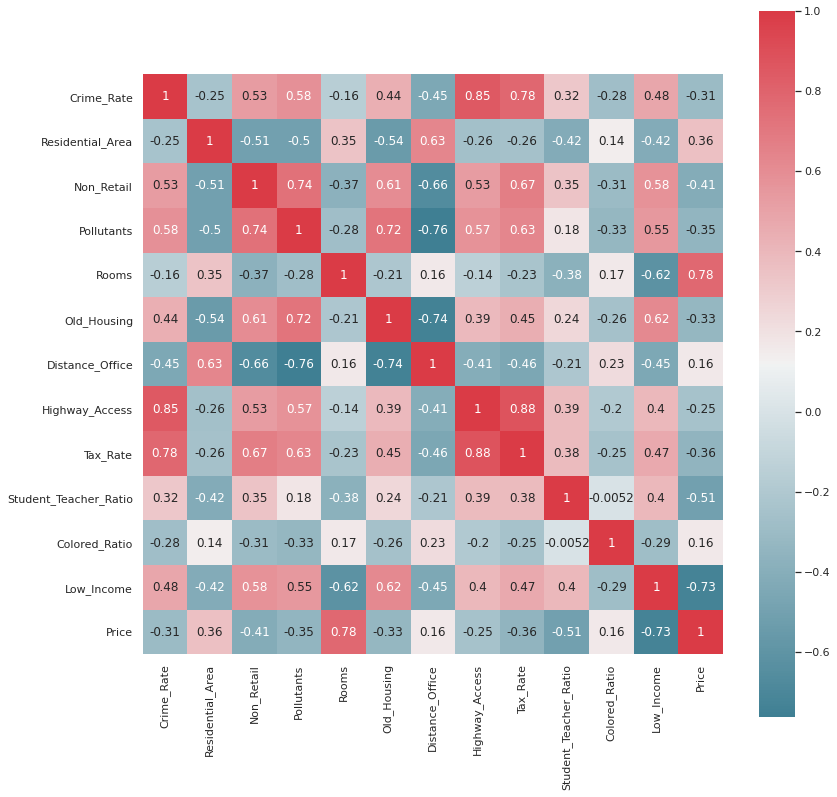

In [52]:
#this code generates the correlation matrix for each variable
f, ax = plt.subplots(figsize=(13,13))

#this code removes ID from the DataFrame to be compared, since the ID variable is not useful in our analysis
df_comparison = df[['Crime_Rate', 'Residential_Area', 'Non_Retail', 'Pollutants', 'Rooms', 'Old_Housing', 'Distance_Office', 'Highway_Access', 'Tax_Rate', 'Student_Teacher_Ratio', 'Colored_Ratio', 'Low_Income', 'Price']]

#this code gets the correlation coefficients for all the variables except ID
corr = df_comparison.corr()

#this code generates the heatmap of the correlation coefficient
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Before deciding on which pairs of variables we wish to focus on, we **plotted a corrrelation matrix** in order to determine the correlation coefficient between each variable to **summarize a large amount of data in order to see the overall patterns**. Following the convention, we define any **r value that is more than 0.7 and less than -0.7 to be a strong positive and a strong negative relationship respectively**. For our dependent variable, `Price`, it seems to suggest a strong positive relationship with `Rooms`, as well as a strong negative relationship with `Low_Income`. We will be focusing the analysis of variables.

Additionally, as mentioned previously, we also found like to further investigate the relationship of both variables `Crime_Rates` and `Colored_Ratio` with `Price`, since we found these variables interesting and would like to provide further analysis on it.

Lastly, we would like to investigate the relationship of `Tax_Rates` with serveral other variables since we found its distribution to be interesting as well.

However, it is important to note the following **disadvantages** of using correlation coefficient.

1. **Correlation does not always prove causation**, as a third variable may be involved. Causation means that one variable (the independent variable) causes the other (dependent variable, in this case, Price). Meanwhile, a correlation between variables, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable. A correlation only shows if there is a relationship between variables. 

2. Correlation coefficient r only shows if there is a **linear relationship** between 2 variables. In other words, some variables **may have a non-linear relationship** with `Price`, but may not be reflected as a strong relationship in terms of the r value. 

### 1: Price vs Rooms bivariate analysis

We decided to explore the relationship between `Price` and `Rooms`.

**Hypothesis:**

We felt that there should be a **postive linear relationship** between both variables. As when there are more rooms in a house, it is likely to indicate that the house is bigger and more luxurious as well. As such, we would expect that when the rooms per unit increase, the price of houses in that town will also increase. 

In order to investigate this hypothesis, we plotted a scatter plot of `Price` against `Rooms` as shown below, and calculated their correlation coefficient.

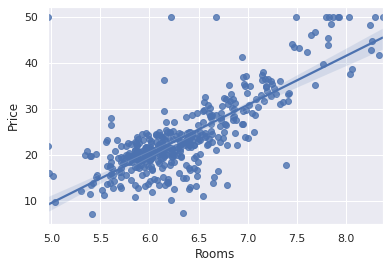

In [53]:
#creating scatter plot between price and rooms
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Rooms", y ="Price", data = df) 

In [54]:
xs_Rooms = df["Rooms"]
ys_Price = df["Price"]
np.corrcoef(xs_Rooms, ys_Price) # calculating correlation coefficient between Rooms and Price

array([[1.        , 0.77774274],
       [0.77774274, 1.        ]])

**Conslusion:**

Based on the scatter plot above, we can conclude that our hypothesis was valid since there is a **strong positive linear relationship** between `Rooms` and `Price`. Their correlation coefficient is 0.720. 

In other words, the more number of rooms per unit, the pricier the houses. Additionally, we found it interesting that for 5.0 - 8.0 rooms per unit, there is consistently some towns with housing prices that have the **maximum price of $50,000**. 

### 2: Price vs Low Income bivariate analysis

We decided to explore the relationship between `Price` and `Low Income`.

**Hypothesis:** 

We felt that there would be a **negative linear relationship** between the two variables. When the percentage of low income households in the town is high, it would likely **represent a town where the people of lower socio-economic status would reside**. 

This would signal that the houses in the area are not very highly priced because the poorer people would be unable to afford luxurious houses. Additionally, it could also mean that there could be **poorer infrastructure** in the town, leading to a general devaluation of house prices. 

Conversely, the towns with lower percentage of low income household would likely represent areas where the people of higher socio-economic status would reside, and the prices of houses in those towns are expected to be higher.

In order to investigate this relationship, we created a scatter plot of `Price` against `Low_income`, and calculated its correlation coefficient as shown below.

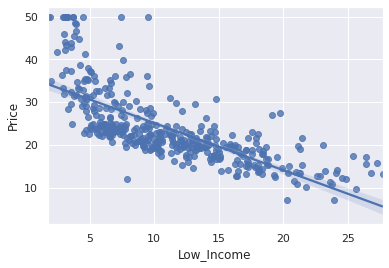

In [55]:
# creating scatter plot between price and low_income
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Low_Income", y ="Price", data = df) 

In [56]:
# getting the correlation coefficient between price and low_income
xs_Low_Income = df["Low_Income"]
ys_Price = df["Price"]
np.corrcoef(xs_Low_Income, ys_Price)

array([[ 1.        , -0.73266782],
       [-0.73266782,  1.        ]])

**Conclusion:**

Based on the scatter plot above, we can conclude that there is a **strong negative linear relationship** between `Low_Income` and `Price`. Their correlation coefficient is -0.743. In other words, the higher the percentage of low income households in the town, the lower the prices of housing in the town. 

### 3: Price vs Crime Rate bivariate analysis

We decided to explore the analysis between `Price` and `Crime Rate` because we believe that these 2 variables are interesting variables to explore. 

**Hypothesis:** 

We felt that the prices of houses in a town should have a **negative linear relationship** with its crime rate, because **residents or potential investors would value their safety and well-being**, and would not be interested to stay in areas with high crime rates. Additionally, areas with higher crime rates are likely to be more run down with **lower safety enforcements**, which would likely mean that housing prices are lower in the area as well.

In order to investigate this relationship, we created a scatter plot of `Price` against `Crime_Rate` and calculated the correlation coefficient as shown below.

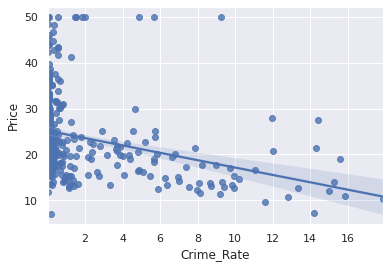

In [57]:
#creating scatter plot between price and crime_rate
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Crime_Rate", y ="Price", data = df) 

In [58]:
#getting the correlation coefficient between price and crime_rate
xs_Crime_Rate = df["Crime_Rate"]
ys_Price = df["Price"]
np.corrcoef(xs_Crime_Rate, ys_Price)

array([[ 1.        , -0.30631308],
       [-0.30631308,  1.        ]])

**Conclusion:**

Based on the scatter plot above, we can conclude that there is a **weak negative linear relationship** between `Crime_Rate` and `Price`. Their correlation coefficient is -0.395. This shows that is a minimal relationship between the 2 variables.

Additionally, we wanted to investigate whether the relationship with `Price` differs for High and Low `Crime_Rate`.

We define High `Crime_Rate` to be the outlier data points that have a crime rate above the upper threshold (9.07189) as mentioned in the section above where we identified the outliers. We define Low `Crime_Rate` to be data points that have a crime rate lesser than the upper threshold.

We then proceeded to plot a scatter plot and calculate the relevant correlation coefficients.

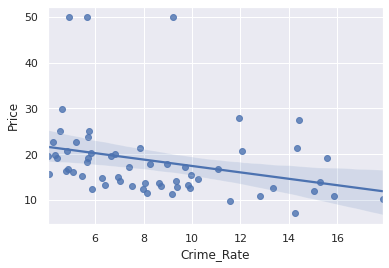

In [59]:
upper_threshold = q3_Crime_Rate + 1.5 * (q3_Crime_Rate-q1_Crime_Rate) # determines upper threshold. Plots above this value would be considered outliers

High_Crime_Rate = df[(df.Crime_Rate > upper_threshold)] #create the dataframe for High crime rate

#creating scatter plot between price and High crime_rate
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Crime_Rate", y ="Price", data = High_Crime_Rate) 

In [60]:
#calculate the correlation coefficient between crime rate and price for High crime rate
np.corrcoef(High_Crime_Rate.Crime_Rate, High_Crime_Rate.Price)

array([[ 1.        , -0.28898886],
       [-0.28898886,  1.        ]])

Based on the correlation coefficient as shown above, there is a **weak negative linear relationship** between `Price` and High `Crime Rate`.

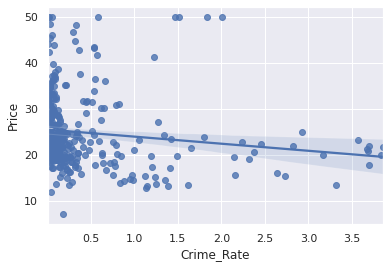

In [61]:
Low_Crime_Rate = df[(df.Crime_Rate <= upper_threshold)] #create the dataframe for Low crime rate

#creating scatter plot between price and High crime_rate
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Crime_Rate", y ="Price", data = Low_Crime_Rate)

In [62]:
#calculate the correlation coefficient between crime rate and price for Low crime rate
np.corrcoef(Low_Crime_Rate.Crime_Rate, Low_Crime_Rate.Price)

array([[ 1.        , -0.13980946],
       [-0.13980946,  1.        ]])

Similarly, based on the correlation coefficient as shown above, there is a **weak negative linear relationship** between `Price` and Low `Crime Rate`. 

**Conclusion:** 

Unlike what we hypothesised, there seems to be no difference in the relationship with `Price` for high versus low `Crime_Rate`, based on the scatter plot and correlation coefficient as shown above.

### 4: Price vs Tax Rate bivariate analysis

We wanted to explore the relationship between `Price` and `Tax Rate`. 

**Hypothesis:** 

We believe that there would be a **positive linear relationship** between `Tax_Rate` and `Price` of the town. Generally, the tax rate is supposed to reflect the value of houses in the town. Hence, with a higher tax rate for a town, the housing prices of the town should generally be higher. 

In order to investigate this relationship, we created a scatter plot of `Price` against `Tax_Rate`and calculated the correlation coefficient as shown below.

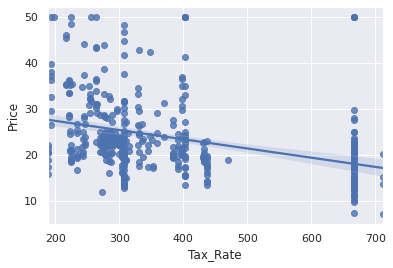

In [63]:
#creating scatter plot between price and tax_rate
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Tax_Rate", y ="Price", data = df) 

In [64]:
#getting the correlation coefficient between price and tax_rate
xs_Tax_Rate = df["Tax_Rate"]
ys_Price = df["Price"]
np.corrcoef(xs_Tax_Rate, ys_Price)

array([[ 1.        , -0.35520415],
       [-0.35520415,  1.        ]])

**Conclusion:**

Based on the scatter plot above, we can conclude that there is a **weak negative relationship** between `Tax_Rate` and `Price`. Their correlation coefficient is -0.420. Our hypothesis was thus proven wrong. 

### 5: Price vs Highway Access bivariate analysis

We wanted to explore the relationship between `Price` and `Highway Access`. 

**Hypothesis:**

We felt that there would be a **positive linear relationship** between `Highway_Access` and `Price`. With greater `Highway_Access`, the `Price` would be higher as it could imply that the town areas are more well-connected and thus more developed.

In order to investigate this relationship, we created a scatter plot of `Price` against `Highway_Access`and calculated the correlation coefficient as shown below.

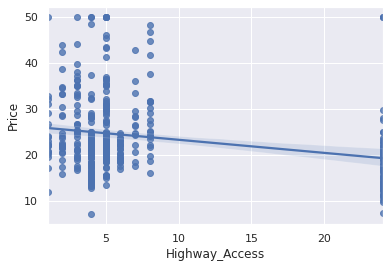

In [65]:
#creating scatter plot between price and highway_access
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Highway_Access", y ="Price", data = df) 

In [66]:
# finding the number of data points with Highway_Access having the value of 24
count = len(df[df["Highway_Access"] == 24].value_counts())
print(f"Number of data points with Highway_Access having the value of 24: {count}")

Number of data points with Highway_Access having the value of 24: 69


As shown from the calculation above, there are **106 data points with a `Highway_Access` index value of 24**, while the rest of the data points seem to be normally distributed, as shown by the histogram plotted in the univariate analysis in the previous section. 

We found this distribution interesting and would like to perform an analysis on the relationship of `Highway_Access` with `Price` when the value of `Highway_Access` is 24 (high `Highway_Access`), **versus** when the value of `Highway_Access` is between 1 to 8 (low `Highway_Access`). 

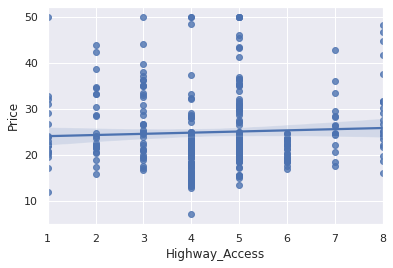

In [67]:
#declaring a new dataframe for towns with highway access index between 1 to 8
highwayAccess_lessThan24 = df[df.Highway_Access < 24]

# creating the scatter plot for highway access against price when its value is between 1 to 8
sns.set_theme(color_codes = True)
ax = sns.regplot(x = "Highway_Access", y ="Price", data = highwayAccess_lessThan24) 

In [68]:
# finding out the correlation coefficient of Highway_Access and Prices when the value of Highway_Access is between 1 - 8
cond1 = df.Highway_Access < 24
xs_Highway_Access = df.Highway_Access[cond1]
ys_Price = df.Price[cond1]
np.corrcoef(xs_Highway_Access,ys_Price)

array([[1.        , 0.05173828],
       [0.05173828, 1.        ]])

As shown above from the scatter plot, and calculation of correlation coefficient above, we concluded that there is likely **no correlation** between `Highway_Access` and `Price`, when the value of `Highway_Access` is low (between 1 - 8) since the value of correlation coefficient is low (0.0457). 

Following which, we proceeded to investigate more about **difference in housing prices** when the highway access is low (from 1 - 8), as compared to when it is high (24).

In [69]:
#finding the five-number summary of the data points with Highway_Acess index value less than 24
testdata1 = df[cond1]
testdata1.Price.describe()

count    340.000000
mean      24.893824
std        8.193057
min        7.000000
25%       19.600000
50%       22.800000
75%       28.525000
max       50.000000
Name: Price, dtype: float64

In [70]:
#finding the five-number summary of the data points with Highway_Acess index value of 24
cond2 = df.Highway_Access == 24
testdata = df[cond2]
testdata.Price.describe()

count    69.000000
mean     18.869565
std       8.163176
min       7.200000
25%      13.800000
50%      17.800000
75%      21.200000
max      50.000000
Name: Price, dtype: float64

**Conclusion:**

Based on the calculations above, we found out that when the `Highway_Access` is relatively lower, the housing prices would tend to have a **higher mean** of **24.7** (to 3.sf) as compared to when the `Highway_Access` is higher, it has a lower mean of **17.5** (to 3 s.f).

### 6: Tax Rate vs Highway Access bivariate analysis

We wanted to explore the relationship between `Tax_Rate` and `Highway_Access`. 

**Hypothesis:**

We felt that there would be a **positive linear relationship** between `Tax_Rate` and `Highway_Access`. With a higher `Tax_Rate`, it would mean that the houses in the town generally have a higher value. Hence, it could imply that the town is more developed and thus are well-connected, with a higher highway access. 

In order to investigate this relationship, we created a scatter plot of `Highway_Access` against `Tax_Rate`and calculated the correlation coefficient as shown below.

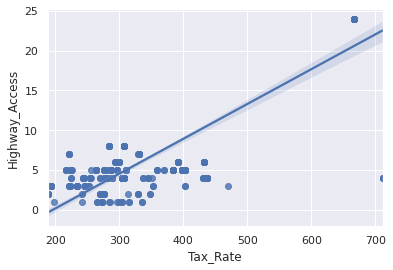

In [71]:
#plotting the values of highway_access against tax_rate
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Tax_Rate", y ="Highway_Access", data = df) 

In [72]:
np.corrcoef(df.Tax_Rate, df.Highway_Access)

array([[1.       , 0.8794188],
       [0.8794188, 1.       ]])

In [73]:
data2 = df[(df.Tax_Rate == 666) | (df.Tax_Rate == 711)]

pd.crosstab(data2.Tax_Rate, data2.Highway_Access)

Highway_Access,4,24
Tax_Rate,,
666,0,69
711,4,0


From the scatter plot, it seems to suggest that there **generally a strong positive correlation** between `Highway_Access` and `Tax_Rate`, with the correlation coefficient value of 0.879 (to 3 s.f). However, it seems to be **caused by the 2 points that lie significantly further from the majority of the data points**. We found this interesting and decided to invesitgate further. Based on the histogram we plotted in the univariate analysis, we found out that the **2 clusters** correspond to (1) 79 data points where `Tax_Rate` = 66 and `Highway_Access` = 24, and (2) 5 data points where `Tax_Rate`= 711 and `Highway_Access` = 4. 

We suspected that these 2 clusters were the **cause of the strong relationship** between `Highway_Access` and `Tax_Rate`, and decided to investigate further. In other words, the relationship between the 2 variables when `Tax_Rate` is low (below 666) may not be as strong as the correlation coefficient seems to suggest.

We invesitgated this further below by creating a scatter plot and calculating the correlation coefficient for data rows corresponding to the lower tax rates (below 666).

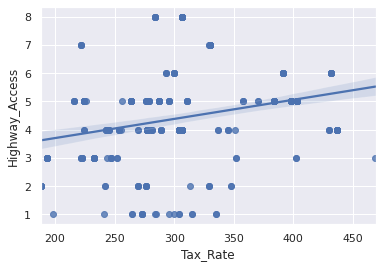

In [74]:
# declaring a new dataframe for data rows with tax rate less than 666
Lower_Tax_Rate = df[df.Tax_Rate < 666]

# creating scatter plot for lower tax rate (data points where tax rate less than 666)
sns.set_theme(color_codes=True)
ax = sns.regplot(x = "Tax_Rate", y ="Highway_Access", data = Lower_Tax_Rate)  

In [75]:
# calculating the correlation coefficient with and without data rows with high tax rate (666 and 711)
print(np.corrcoef(Lower_Tax_Rate.Tax_Rate, Lower_Tax_Rate.Highway_Access))

[[1.         0.26846597]
 [0.26846597 1.        ]]


**Conclusion:**

As shown in the scatter plot and calculation of the correlation coefficient above, after excluding the data rows corresponding to higher `Tax_Rate` (values of tax rate 666 and 710), the correlation is now significantly reduced to 0.275 (to 3 s.f.). 

This indicates that the **lower tax rates in fact do not have a strong relationship with highway access**. Assuming that there are no errors in collection and keying in of data, we decided that the 2 clusters (when the tax rate is high) is due to an uncommon phenomenon that we do not have any explanation for due to lack of background information on the dataset provided. 

### 7. Pollutants vs Rooms vs River trivariate analysis

We wanted to conduct a trivariate analysis between `Pollutants`, `Distance_Office` and `River` since we thought that there could be a possible correlation between `Pollutants` and `Distance_Office` and `River`. We felt that the pollutants are likely to increase as the distance from the office decrease, since there will be more economic activites in areas with many offices. 

Additionally, we also wanted to investigate if the distance from the office would affect the presence of a river in the area. Lastly, we also wanted to find out if the presence of a river has an impact on the pollution level of the area. As such, we decided to conduct a trivariate analysis of these 3 variables. 

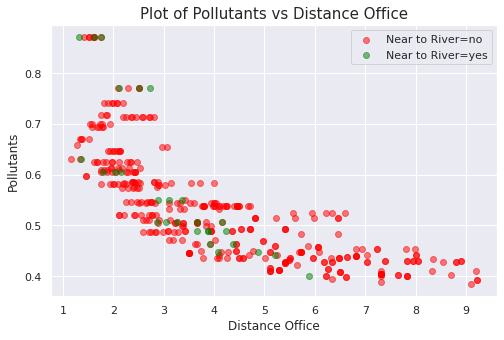

In [76]:
#Plotting the scatter plot of pollutants vs rooms, while assigning a color to the third dimension, river, for each pair of values in the scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df[df.River=='0'].Distance_Office, df[df.River=='0'].Pollutants, c='red', label='Near to River=no', alpha=0.5)
plt.scatter(df[df.River=='1'].Distance_Office, df[df.River=='1'].Pollutants, c='green', label='Near to River=yes', alpha=0.5)
plt.xlabel("Distance Office", fontsize=12)
plt.ylabel("Pollutants", fontsize=12)
plt.title("Plot of Pollutants vs Distance Office", fontsize=15)
plt.legend()
plt.show()

In [77]:
#getting the correlation coefficient between distance_office and pollutants
np.corrcoef(df.Pollutants, df.Distance_Office)

array([[ 1.        , -0.76344863],
       [-0.76344863,  1.        ]])

**Conclusion:**

From the graph, there is a **strong negative linear** relationship between `Distance_Office` and `Pollutants`. In other words, the lower the concentration of pollutants level, the higher the weighed distance of the houses from major office areas. This is reflected in the correlation coefficient of **-0.758** (to 3 s.f.) above as well. 

Additionally, we can see that **houses that are located near to a river generally fall in the lower quadrant of the scatter plot**, corresponding to areas that are **closer to major office areas, with lesser pollutants**. Furthermore, there are **no houses located near a river** when the distance from major office areas are high, specifically weight index of 6 and above.

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [10% of Part II]

#### **a.** State the problem you are investigating, and the motivation behind it, in **no more than 50 words**.

**Response.** 

House price prediction **can help one plan the right time to purchase a house**. Consequently, it is pivotal to identify and understand factors that drive house prices and **develop a sound method to be able to predict the fair value of a house**.

#### **b.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 50 words**.



**Response.** 

We would be **predicting the housing price**. Since the dataset contains variables regarding houses in a region, it would only be logical to use these variables to predict housing prices in towns.

#### **c.** State if it is a classification and/or regression problem.

**Response.** 

It is a regression problem as the dependent variable `Price` is **numerical and continuous.**

### 2. Model training [35% of Part II]

#### **a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

We performed feature selection in order to:

    1. Reduce Overfitting: Reduce redundant data so that decisions made would not be affected by noise.
    2. Improve Accuracy: Less misleading data means modeling accuracy improves.
    3. Reduce Training Time: Fewer data points reduce algorithm complexity and algorithms train faster.
    
    
We started the feature selection process by **splitting the categorial and numerical features** in the dataframe as shown below.

In [78]:
# separating categorial and numerical features
datatypes = df.dtypes
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

### **Categorical Variables**

We only have one categorial variable, `River`. We plotted a histogram below in order to get a better understanding of the distribution of the data.

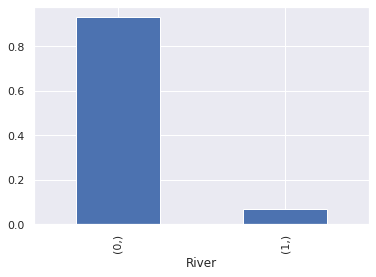

In [79]:
# This code plots the bar graph for the distribution of the counts for 'River'
df[categorical_features].value_counts(normalize=True).plot(kind='bar') 
# Frequency of mode is > 50%, lack of varation in this variable

plt.show()

From the graph above, we observed that the `River` variable **has a dominant value, with a frequency of more than 85%**. Consequently, there is a **lack of variation in this variable** which means that it is likely to have **little explanatory power** on the variation in `Price`. Hence we will **not select this feature**.  

The criteria we use is that we will not select categorical features with a **mode of frequency more than 50%.**

### **Numerical Variables**

Moving on to numerical variables, we want to select features so that they can be our attributes in our model later. We started off by plotting histograms for all the features.

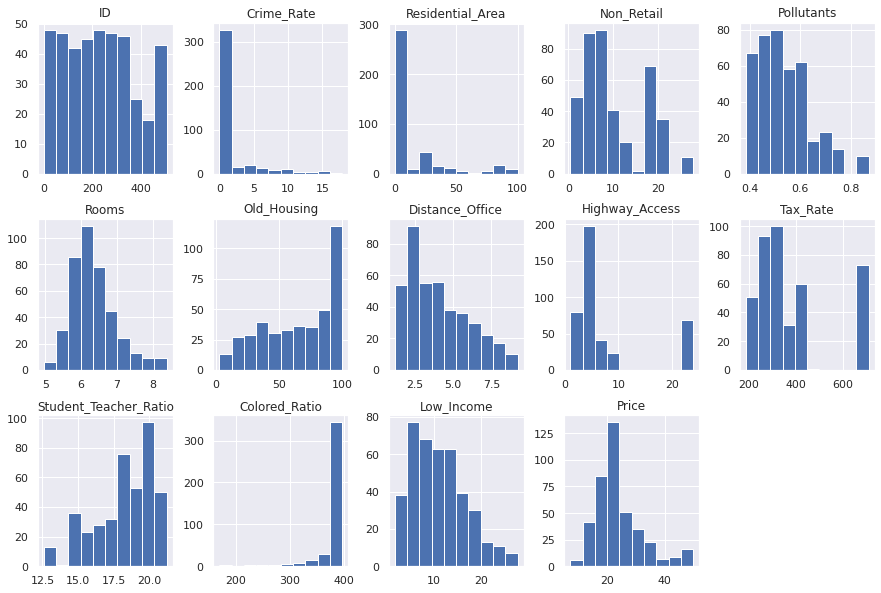

In [80]:
# This code shows the histograms of all the numerical variables 
df[numerical_features].hist(layout=(3,5), figsize=(15,10))

plt.show()

**Response.** 

Based on a visual observation we noted the following:

1. The variable `ID` is an <b>index</b> and **would not have explanatory power** in explaining our dependent variable `Price`. Hence, we will not be using this variable.
2. There are a few variables which are **dominated by a small range of values**. Such variables include `Crime_Rate`, `Residential_Area`, `Colored_Ratio`, which will not be selected as there is **little variation** in these variables, hence they are less likely to explain the variation in `Price`. 

We then dropped the mentioned features as shown in the code below.

In [81]:
# These are the numerical features that we will not be using
features_to_drop = ['ID', 'Crime_Rate', 'Residential_Area', 'Colored_Ratio']

# creating a new DataFrame without the features to be dropped
dfTemp = df[numerical_features].drop(columns=features_to_drop, inplace=False)

dfTemp.head()

,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


After dropping the variables that we were not interested in, we proceeded to plotted a **correlation heatmap** as shown below. It displays the correlation coefficient value between each variable. Correlation is a **measure of the linear relationship of 2 or more variables**. Through correlation, we can predict one variable from the other. The rationale of using correlation for feature selection is that we should select features that are **highly correlated** with our dependent variable, `Price`. (Shaikh, 2018)


<AxesSubplot:>

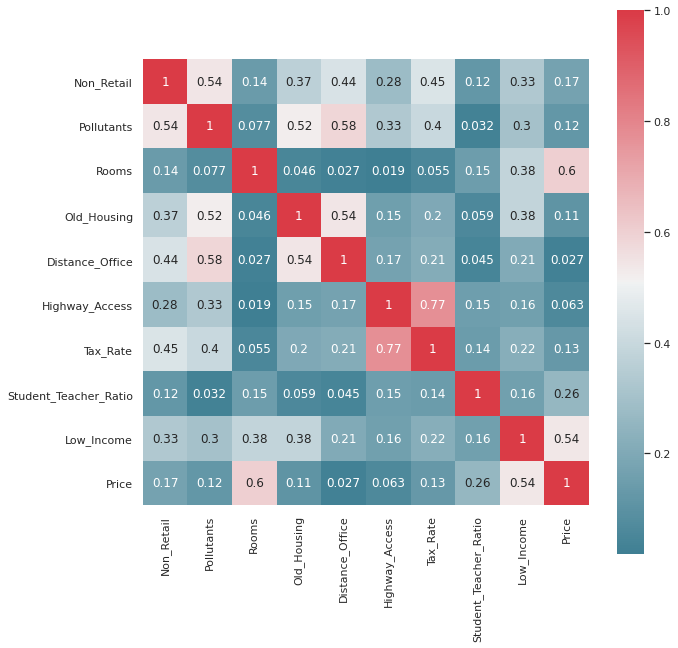

In [82]:
# this code generates the correlation matrix for each variable
f, ax = plt.subplots(figsize=(10,10))

# this code gets the correlation coefficients (r-squared score) for all the variables excluding the features that we decided to remove
r2 = dfTemp.corr()**2;

# this code generates the heatmap of the correlation coefficient
sns.heatmap(r2,
            mask=np.zeros_like(r2, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Unlike in EDA analysis in part I where we calculated the r value, we **calculated R-squared $r^2$ value** here instead. The darker shades of blue represents lower the correlation between the variables. 

We used the $r^2$ value since it is a statistical measure that **represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model**. While the correlation r value simply explains the strength of the relationship between 2 variables, $r^2$ explains to what **extent the variance of one variable explains the variance of the second variable**. In other words, if the $r^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs. (Fernando, 2020)

Here, we are **interested in the variables that are highly correlated to** `Price`, which we define as those that have a $r^2$ value that is **more than 0.5**. From the heatmap above, we can see that only the variables `Rooms` and `Low_Income` are strongly correlated with our dependent variable `Price`. 

As shown in our code below, only `Rooms` and `Low_Income` will be added to the list of features selected. 

In [83]:
def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]**2
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(dfTemp, 'Price', 0.5)
print(f"updated selected features: {features_selected}")

updated selected features: ['Rooms', 'Low_Income']


However, before using these 2 features, we need to **check that our selected features are not correlated amongst each other**. Should `Rooms` and `Low_Income` be strongly correlated, we can only use one of the two variables. Hence, we found the $r^2$ value between the 2 variables as shown below.  

In [84]:
## finding the R2 value between Low_Income and Rooms
np.corrcoef(df.Low_Income, df.Rooms)**2

array([[1.        , 0.38012063],
       [0.38012063, 1.        ]])

Since the $r^2$ value between the two selected features, `Rooms` and `Low_Income` are below the threshold value of 0.5, they are **not strongly correlated**, and thus we can **use both features to train and test our model.**

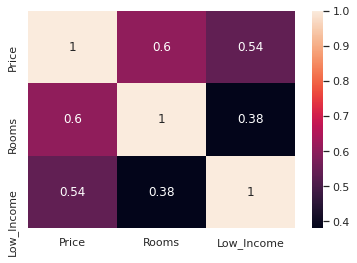

In [85]:
dfTemp[['Price']+features_selected].corr()
r2 = abs(dfTemp[['Price']+features_selected].corr())**2
sns.heatmap(r2, annot=True)

plt.show()

#### **b.** Split the dataset into train and test sets. Describe how you split step by step.

**Response.** 

For an unbiased estimation of the predictive performance of machine learning models, we should distinguish between data that will be used for **model fitting** as well as data that will be used to **test our model**. Hence, we needed to split our dataset into training and test sets. 

In order to do so, we used the `model_selection` package from `scikit-learn` to split our dataset **randomly** into 75/25. In other words, we will **keep 25% of the dataset for the purpose of our model evaluation.**

In [86]:
from sklearn.model_selection import train_test_split

X = df[features_selected]
y = df[["Price"]]

#Splitting our dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_temp = X_train.values.reshape(-1,2)

#### **c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

**Response.** 

We will be training the `Linear Regression` model since it allows us to **model the relationship between a scalar response and several explanatory variables**. It follows the least squares method to find the best fit for our data.
 
We will also be training the `Ridge Regression` model to analyze multiple regression data that may **suffer from multicollinearity.**

#### **d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

## Model 1: model fitting for Linear Regression

Our multiple regression models describes how a **single response variable `Price` depends linearly on 2 predictor variables, `Rooms` and `Low_Income`.** This will allow us to estimate how `Price` changes as the 2 independent variables change.

In [87]:
## Model 1: model fitting for linear regression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
model_test = model1.score(X_test, y_test)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Training accuracy: {model1_r2}")
print(f"Testing accuracy: {model_test}")
print(f"Coeff of Determination : {model1_r2}")
print(f"Rooms Coefficient: {coef1[0][0]}")
print(f"Low Income Coefficient: {coef1[0][1]}")

Model 1: Linear Regression 
--------------------------
Features : ['Rooms', 'Low_Income']
Coefficients: [ 7.89501594 -0.55334513]
Intercept : -20.09630176675939
Training accuracy: 0.7237716008607127
Testing accuracy: 0.6564913164348888
Coeff of Determination : 0.7237716008607127
Rooms Coefficient: 7.8950159428021855
Low Income Coefficient: -0.5533451335567545


From our code above, we derived the following equation that represents the relationship between the 2 predictor variables with `Price`:

$ Price = -20.096 + 7.8950  \times Room -0.55335 \times Low Income $


Next, also we provided a visualisation for our linear regression model as shown below.

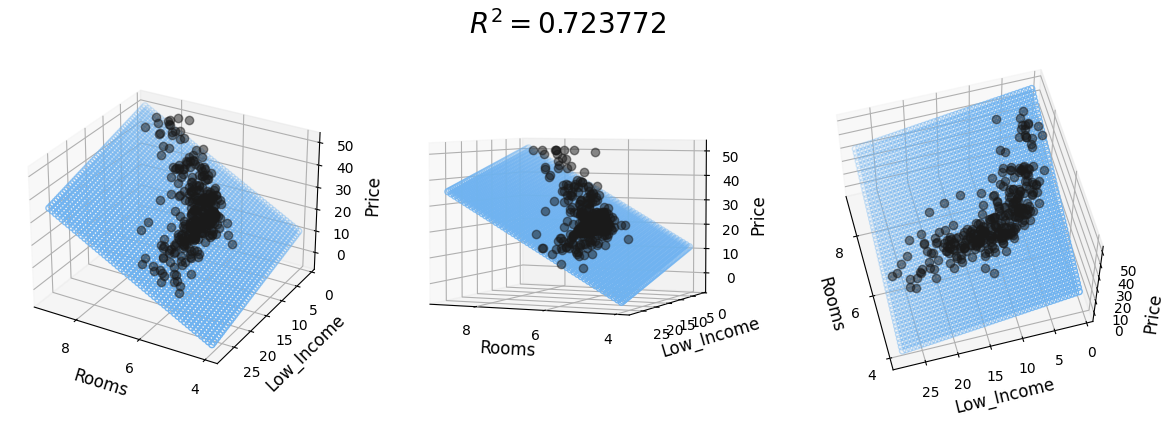

In [88]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

X = X_train[['Rooms', 'Low_Income']].values.reshape(-1,2)
Y = y_train['Price']

# Prepare model data point for visualization
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(4, 9)   # this is the range of Rooms values
y_pred = np.linspace(1, 28)  # this is the range of Low_Income values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#Train 
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate
r2 = model.score(X, Y)

# Plot 
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Rooms', fontsize=12)
    ax.set_ylabel('Low_Income', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %f$' % r2, fontsize=20)
fig.tight_layout()

**Response.** 

For the `Linear Regression` model, our trained parameters are `Rooms` and `Low_Income` with a **training score of 72.3772%.**

## Model 2: model fitting for Ridge Regression

Ridge Regression is used to **analyze multiple regression data that may suffer from multicollinearity.** 

Though biased, variances of least squares estimates are large and may be far from the true value. By adding a degree of bias to regression estimates, ridge regression **reduces standard errors** by giving more reliable estimates. (G, 2020)


In [89]:
# Model 2: model fitting for ridge

from sklearn.linear_model import Ridge

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
model2_test = model2.score(X_test,y_test)
coef2 = model2.coef_
bias2 = model2.intercept_

print("Model 2: Ridge Regression")
print("-------------------------")
print(f"Training accuracy : {model2_r2}")
print(f"Testing accuracy : {model2_test}")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")
print(f"Rooms Coefficient: {coef2[0][0]}")
print(f"Low Income Coefficient: {coef2[0][1]}")


Model 2: Ridge Regression
-------------------------
Training accuracy : 0.7237338545567977
Testing accuracy : 0.6583440164650849
Features : ['Rooms', 'Low_Income']
Coefficients: [ 7.78881663 -0.56071706]
Intercept : -19.339021781133468
Coeff of Determination : 0.7237338545567977
Rooms Coefficient: 7.788816632267617
Low Income Coefficient: -0.560717064712289


As such, we can derive the following equation:

$ Price = -19.339 + 7.7888  \times Room -0.56072 \times Low Income $


Next, we provided a visualisation for our ridge regression model as shown below.

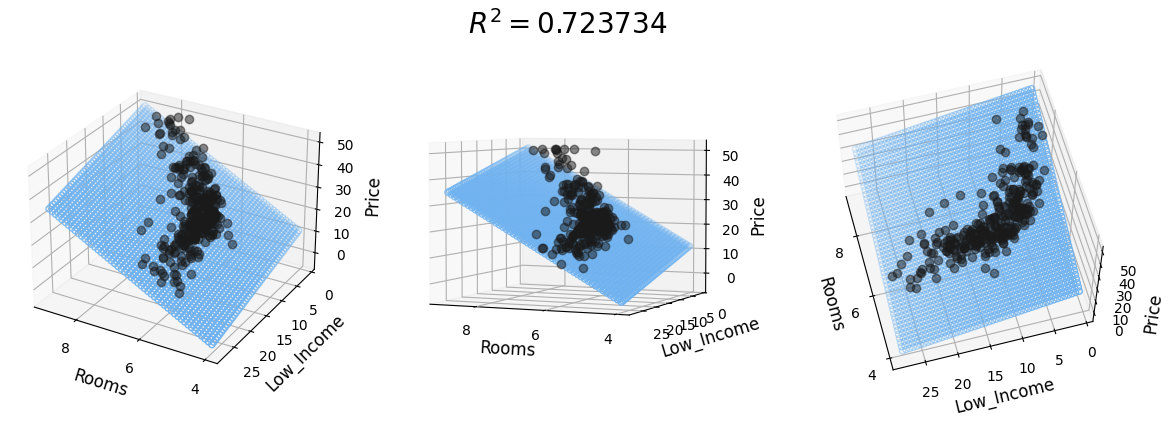

In [90]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

X = X_train[['Rooms', 'Low_Income']].values.reshape(-1,2)
Y = y_train['Price']

# Prepare model data point for visualization
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(4, 9)   # this is the range of Rooms values
y_pred = np.linspace(1, 28)  # this is the range of Low_Income values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#Train 
ridreg = linear_model.Ridge()
model = ridreg.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate
r2 = model.score(X, Y)

# Plot 
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Rooms', fontsize=12)
    ax.set_ylabel('Low_Income', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %f$' % r2, fontsize=20)
fig.tight_layout()

**Response.** 

For the `Ridge Regression` model, our trained parameters are `Rooms` and `Low_Income` with a **training score of 72.3734%.**

### 3. Model evaluation and selection [30% of Part II]

#### **a.** For each model, predict the response variable on the test set.

In [91]:
# predict based on test set using Model1
y_pred1 = model1.predict(X_test)


# predict based on test set using model2
y_pred2 = model2.predict(X_test)

**Response.** 

The response variable would be the median housing prices in a neighborhood.  

For the Linear Regression model, our reponse variable can be modelled by this equation:  

$ Price = -20.096 + 7.8950  \times Room + -0.55335 \times Low Income $

For the Ridge model, our response variable can be modelled by this equation:

$ Price = -19.339 + 7.7888  \times Room + -0.56072 \times Low Income $

#### **b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

**Response.**

We will evaluate our models using the **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE) metrics** since they are the most common metrics used to measure accuracy for continuous variables. 

**MAE** measures the **average magnitude of the errors** in a set of predictions, **without any considering for their direction**. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

**RMSE** is a **quadratic scoring rule** that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. (Wesner, 2016)

The difference is between the 2 evaluation metrics is that in RMSE, since the errors are squared before they are averaged, the it gives a relatively **high weight to larger errors**. This suggests that the RMSE would be more **useful when significant errors are undesirable.**

### Model 1 Evaluation: Linear Regression 

In [92]:
# Model 1 evaluation (Linear Regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred1)
ave = np.mean(y_test["Price"])
rmse = mean_squared_error(y_test, y_pred1, squared = False)  # setting squared = False returns the square-root 

print("Model 1 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 1 Evaluation
-----------------
MAE: 3.11
MAE as % of mean: 13.2%
RMSE: 5.02


### Model 2 Evaluation : Ridge Regression

In [93]:
# Model 2 evaluation (Ridge Regression)

from sklearn.metrics import mean_absolute_error, mean_squared_error


# compare with ground truth
mae = mean_absolute_error(y_test, y_pred2)
ave = np.mean(y_test["Price"])
rmse = mean_squared_error(y_test, y_pred2, squared = False)  # setting squared = False returns the square-root 
R2_Score = r2_score(y_test,y_pred2)

print("Model 2 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 2 Evaluation
-----------------
MAE: 3.11
MAE as % of mean: 13.2%
RMSE: 5.00


### Evaluation Conclusion

Based on the evaluation metrics on the test set for the different models, we would select the model with the best evaluation score. In our case here, however, the evaluation scores of `Linear Regression` and `Ridge` are very close to each other, with the **same MAE** score, and `Ridge` **having a slightly lower RMSE score**. Hence, we concluded that the `Ridge` model is slightly better. 

#### **c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

**Response.** 

We decided to choose the **Ridge Regression model**, our second model for the prediction task, since it is our best model according to our evaluation metrics and conclusion as stated above.

### 4. Findings and conclusion [20% of Part II]

#### **a.** Based on on your final model, perform an appropriate hypothesis testing to validate if the predicted value/class is significantly different from actual value/class on the test set.

**Response.** 

We decided to conduct a **paired two-sample t test** for our hypothesis testing. We will compute the test statistic and p-value.  

**Null hypothesis (H<sub>0</sub>):** The mean of the difference betweeen the `Predicted Price` and `Testing Price` is 0. In other words, there is no difference between the two.

**Althernative hypothesis (H<sub>1</sub>):** The mean of the difference between the `Predicted Price` and `Testing Price` is not equal to 0. In other words, there is difference between the two.

Firstly, we used  the following equation from the Ridge Regression to compute the `Predicted Price`:

$ Price = -19.339 + 7.7888 \times Room -0.56072 \times Low Income $

The table below shows the `Predicted Price` calculated using our model, as well as the difference between the `Predicted Price` and `Testing Price`.

In [94]:
# Creating a new DataFrame named testingdata so 
# as not to affect the values in X_test. 
testingdata = X_test

# Creating a new column called Predicted Price which 
# finds the predicted price using the equation obtained from the ridge regression model 
testingdata['Predicted Price'] = y_pred2

# Creating a new column named Testing Price using the actual housing prices from the y_test dataframe
testingdata['Testing Price'] = y_test['Price']

# finding the difference between predicted and testing prices
testingdata['Difference in Price'] = testingdata['Predicted Price'] - testingdata['Testing Price'] 
testingdata.head()

,Rooms,Low_Income,Predicted Price,Testing Price,Difference in Price
192,7.178,2.87,34.959846,36.4,-1.440154
152,5.012,12.12,12.902636,15.3,-2.397364
136,5.942,16.90,17.466008,17.4,0.066008
100,6.727,9.42,27.774393,27.5,0.274393
76,6.279,11.97,22.855175,20.0,2.855175


Following which, we conducted the hypothesis testing as shown in the code below.

In [95]:
from scipy import stats

n = len(testingdata)

#creating arrays based on the Predicted Price and Testing Price from the testing dataset 
testingdata_array1 = np.array(testingdata['Predicted Price'])
testingdata_array2 = np.array(testingdata['Testing Price'])

#calculating the t-test on the Predicted Price and Testing Price samples 
stats.ttest_rel(a = testingdata_array1,b = testingdata_array2)

Ttest_relResult(statistic=0.07439724927238586, pvalue=0.9408400080599875)

**Null hypothesis (H<sub>0</sub>):** The mean of the difference betweeen the `Predicted Price` and `Testing Price` is 0. In other words, there is no difference between the means of the two variables.

**Althernative hypothesis (H<sub>1</sub>):** The mean of the difference between the `Predicted Price` and `Testing Price` is not equal to 0. In other words, there is difference between the two.

**Hypothesis Testing Conclusion:**

From our hypothesis testing results, our p-value is **0.941** (to 3 s.f). Since the p-value is **significantly greater** than our significance level of 0.05, we conclude that **we do not have sufficient evidence to reject the null hypothesis**, thereby concluding that the difference between the mean in `Testing Price` and `Predicted Price` is not statistically significant. Ultimately, we **do not reject our null hypothesis.**

#### **b.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

$ Price = -19.339 + 7.7888  \times Room  -0.56072 \times Low Income $

**Response.** 

From the coefficient of Room and Low income, we infer that **Room plays a higher importance** in determining housing prices. 

We also noted:

1. The **positive coefficient of `Room`** indicates a **direct relationship** with `Price`. 
1. The **negative coefficient of `Low Income`** indicates an **inverse relationship** with `Price`. 

Both observations are in line with our intuition of the housing prices mechanism. 

#### **c.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.** 

Our biggest takeaway was **learning to use Python libraries** to aid us in data analysis and forming relationships between variables. This experience was especially meaningful since we got to **apply content taught in the normal classroom setting** when working on the real life datasets provided to us.

### 5. Non-technical protocol [5% of Part II]

#### **a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

**Response.** 

**Cheah King Yeh:** Conistently the first to form the framework of the project, King Yeh would start on certain areas to have a better understanding of the problems the team might face so as to be better prepared. He would also do extra research on difficult topics and explain them in simpler terms to the rest of the team to understand. 

**Lai Jye Yi:** With the large amount of sections of work for each part of the project, Jye Yi kept a clear overview of all the work that had to be done. He actively participated in discussions and ensured that the team was aware of the structure of the report. Constantly cross referencing with the lab exercises provided as well as external research, he ensured that the group was working according to the requirements as well as within the relevant boundaries of the scope of the lesson plan.

**Nicholas Ong:** Nicholas's inquisitive mind led him to explore the topics deeper, allowing us to have a broader perspective on the project and understand the alternative methods that were not well developed during lessons. He consistently generated new pathways to proceed whenever the team was stuck. Kept the team on the right track to progress and prevented wastage on time.

**Yuen Kah May:** Taking on the duty of the scribe, it would not be an exaggeration to suggest that she was involved in typing out almost all of the report. While actively participating in the discussions, Kah May had to sieve through the topics being discussed in order to piece together the report in a coherent manner. Constantly keeping the team's progress in mind, she plans for group meetings in advanced and maps out a timeline to ensure that our group complete the project ahead of time. 

**Yvonne Lim:** Yvonne was enthusiastic about the implementation and constantly explored the documentation to find better ways to present the neccessary information in a clear and consise manner. Meticulously checking every single line in the report, she ensured that the logical and grammatical flow of the report is consistent from start to the end.



#### **b.** List any references and sources you have cited.

**Response.** 

Wesner, J. (2016, March 23). MAE and RMSE - which metric is better? Retrieved April 14, 2021,  from https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

Fernando, J. (2020, November 18). R-squared. Retrieved April 14, 2021, from https://www.investopedia.com/terms/r/r-squared.asp

Shaikh, R. (2018, October 28). Feature selection techniques in machine learning with python. Retrieved April 15, 2021, from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

-, G. (2020, October 20). Ridge regression Definition & examples: What is RIDGE REGRESSION? Retrieved April 14, 2021, from https://www.mygreatlearning.com/blog/what-is-ridge-regression/